<h1 align="center">Netflix Data Analysis Project</h1>
    
<span style="font-size: 15px;">This project analyzes the Netflix Movies & TV Shows Dataset to extract insights about content trends, genres, ratings, and countries of production. The goal is not only to clean and explore the dataset but also to translate numbers into meaningful business insights that highlight Netflix’s content strategy.</span>

<span style="font-size: 15px;">This notebook aims to analyze the data and deliver insights based on the findings.</span>

- Data Import
- Basic Data Exploration
- Data Cleaning
- Data Transformation
- Descriptive Analysis
- Deep-Dive Analysis
- Business Insights Summary

## 1) Import required libraries.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2) Import data

In [9]:
df = pd.read_csv("netflix_titles.csv")

## 3) Basic Exploration

#### Goal: Geting familiar with the dataset

In [10]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."


In [11]:
df.shape

(8807, 12)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [13]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

## 4) Data Cleaning

#### Goal: Prepare for analysis

### null values in `country` fill with "Unknown" instead of dropping.

In [16]:
df["country"].fillna("Unknown", inplace=True)

### null values in `director` fill with "Unknown" instead of dropping. 

In [18]:
df["director"].fillna("Unknown", inplace= True)

### null values in `cast` fill with Not Available

In [22]:
df["cast"].fillna("Not Available", inplace=True)


### null values in `date_added` fill with "Unknown" instead of dropping. 

In [24]:
df["date_added"].fillna("Unknown", inplace=True)


### null values in `rating` fill with "Not Rated" instead of dropping. 

In [26]:
df["rating"].fillna("Not Rated", inplace=True)


### check null in `duration` column

In [28]:
df["duration"].isnull().sum()


np.int64(3)

### drop null value rows in `duration` column

In [29]:
df = df.dropna(subset=["duration"])


### drop min values in `rating` column

In [30]:
df = df[~df["rating"].str.contains("min", na=False)]


### drop invalid values in `cast` column

In [31]:
df = df[~(df["cast"].str.contains("50 Cent", na=False) & 
          df["cast"].str.contains("4Minute", na=False))]

### removing invalid values in `title` column

In [32]:
# Remove rows where title is only digits, date-like, or time-like
df = df[~df["title"].str.match(r"^\d{4}$", na=False)]      # only years
df = df[~df["title"].str.match(r"^\d+[%]$", na=False)]     # percentages
df = df[~df["title"].str.match(r"^\d+:\d+$", na=False)]    # time like 23:59
df = df[~df["title"].str.match(r"^\d+$", na=False)]        # pure numbers
df = df[~df["title"].str.match(r"^[A-Za-z]{3}-\d+$", na=False)] # like Feb-09

### check nulls

In [33]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8785 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8785 non-null   object
 1   type          8785 non-null   object
 2   title         8785 non-null   object
 3   director      8785 non-null   object
 4   cast          8785 non-null   object
 5   country       8785 non-null   object
 6   date_added    8785 non-null   object
 7   release_year  8785 non-null   int64 
 8   rating        8785 non-null   object
 9   duration      8785 non-null   object
 10  listed_in     8785 non-null   object
 11  description   8785 non-null   object
dtypes: int64(1), object(11)
memory usage: 892.2+ KB


#### Converts the `date_added` column to datetime format in the df dataframe.

In [35]:
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8785 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8785 non-null   object        
 1   type          8785 non-null   object        
 2   title         8785 non-null   object        
 3   director      8785 non-null   object        
 4   cast          8785 non-null   object        
 5   country       8785 non-null   object        
 6   date_added    8687 non-null   datetime64[ns]
 7   release_year  8785 non-null   int64         
 8   rating        8785 non-null   object        
 9   duration      8785 non-null   object        
 10  listed_in     8785 non-null   object        
 11  description   8785 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.2+ KB


### create new columns `year_added` and `Month_added` from `date_added`

In [37]:
df["year_added"] = df["date_added"].dt.year


In [38]:
df["month_added"] = df["date_added"].dt.month


In [39]:
df.head(4)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0


## 5) Descriptive Analysis

#### Goal: Understand dataset with simple stats

### Total count of Movies and TV Shows

In [40]:
df["type"].value_counts()

type
Movie      6114
TV Show    2671
Name: count, dtype: int64

### Distribution of `release_year`

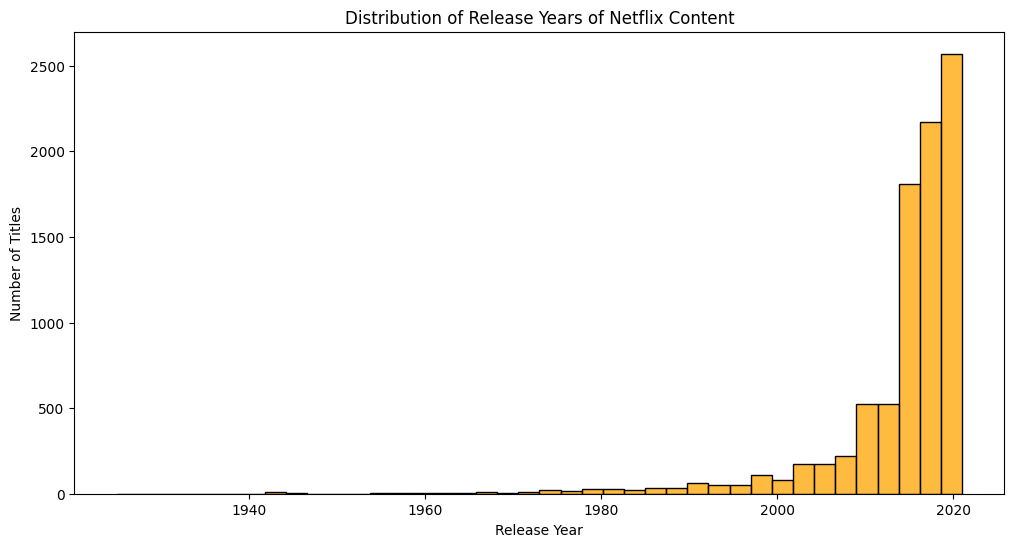

In [42]:
plt.figure(figsize=(12,6))
sns.histplot(df["release_year"], bins=40, kde=False, color="orange")
plt.title("Distribution of Release Years of Netflix Content")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()

### Top 10 countries producing most titles

In [43]:
top_countries = df["country"].value_counts().head(10)
print(top_countries)


country
United States     2808
India              970
Unknown            829
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             108
Name: count, dtype: int64


### Top 10 genres/categories

In [44]:
genres = df["listed_in"].str.split(",").explode().str.strip()


In [45]:
top_genres = genres.value_counts().head(10)
print(top_genres)

listed_in
International Movies        2745
Dramas                      2420
Comedies                    1674
International TV Shows      1346
Documentaries                869
Action & Adventure           857
TV Dramas                    759
Independent Movies           753
Children & Family Movies     641
Romantic Movies              615
Name: count, dtype: int64


### Bar chart - content type (Movie vs TV Show)

<Axes: xlabel='type'>

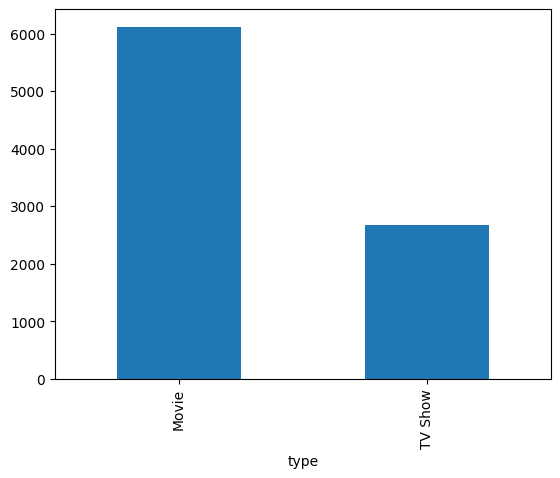

In [46]:
df.type.value_counts().plot(kind="bar")

### Line chart - content trend over years


In [47]:
# Count titles added per year
trend = df["year_added"].value_counts().sort_index()
trend

year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     415
2017.0    1158
2018.0    1623
2019.0    1994
2020.0    1874
2021.0    1496
Name: count, dtype: int64

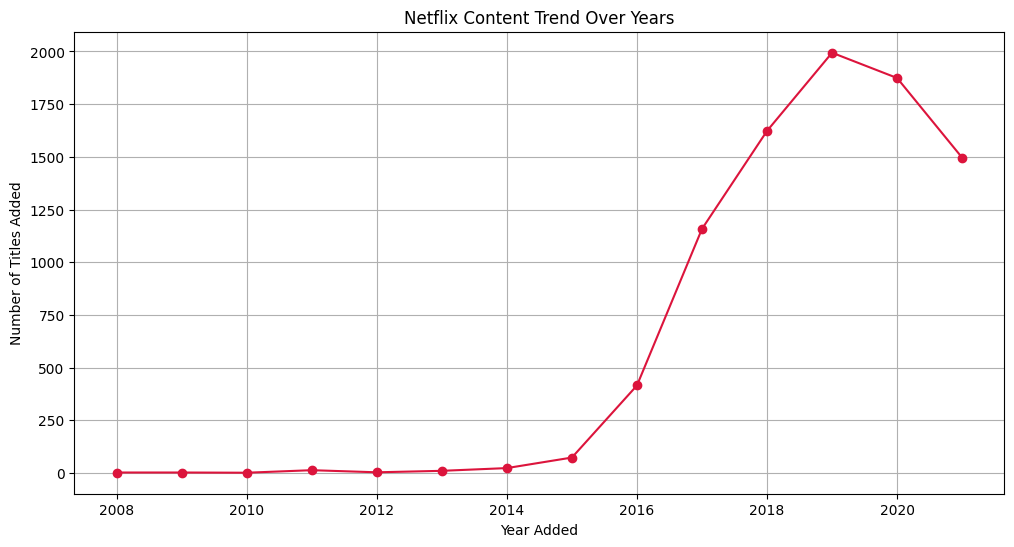

In [48]:
# Line chart
plt.figure(figsize=(12,6))
plt.plot(trend.index, trend.values, marker="o", color="crimson")
plt.title("Netflix Content Trend Over Years")
plt.xlabel("Year Added")
plt.ylabel("Number of Titles Added")
plt.grid(True)
plt.show()

### Horizontal bar chart - top countries

In [49]:
top_countries = df["country"].value_counts().head(10)
top_countries

country
United States     2808
India              970
Unknown            829
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             108
Name: count, dtype: int64

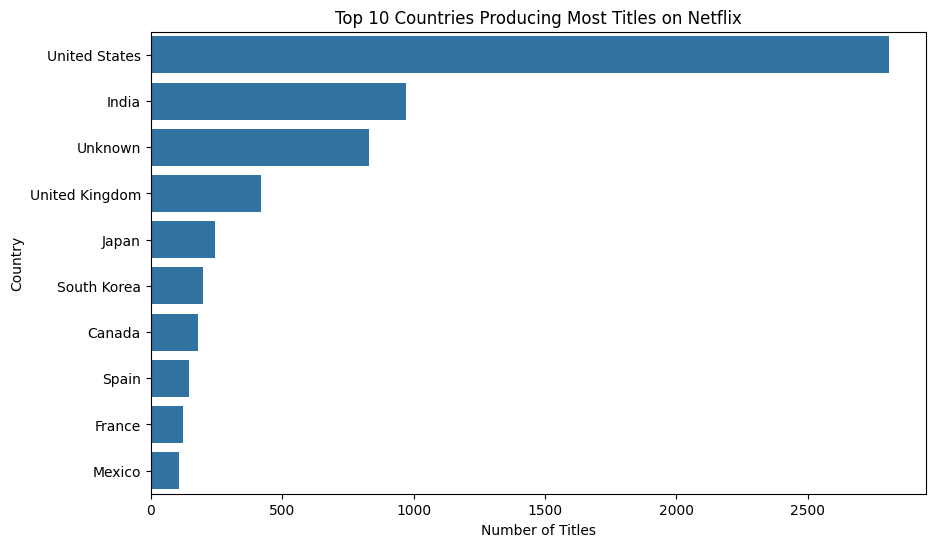

In [50]:
# horizontal bar chart for top_coutries
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries Producing Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()

## 6) Deep-Dive Analysis

#### Goal: Extract business-like insights

### Most common ratings

In [51]:
common_ratings = df["rating"].value_counts().head(10)
common_ratings

rating
TV-MA    3199
TV-14    2156
TV-PG     863
R         796
PG-13     486
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64

- Most common ratings are TV-MA, TV-14, TV-PG 

### visualization for most common ratings

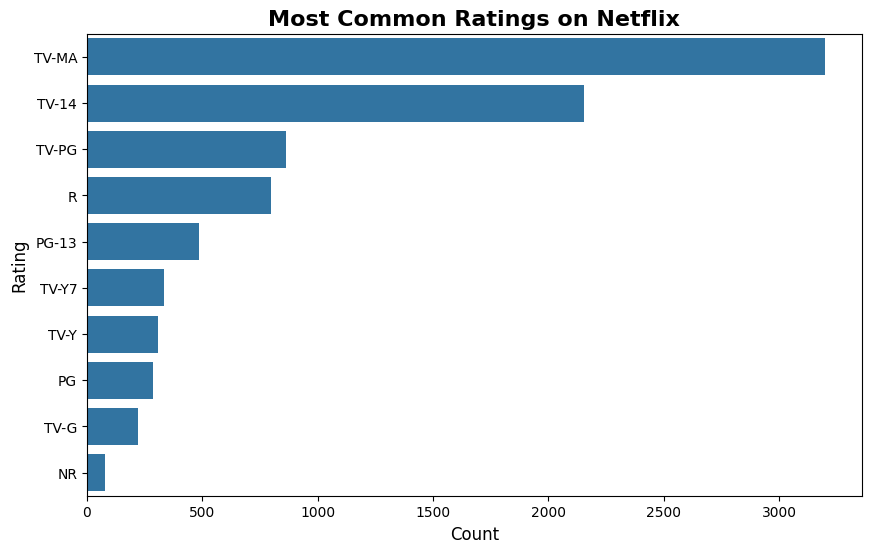

In [52]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=common_ratings.values, y=common_ratings.index)

plt.title("Most Common Ratings on Netflix", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=12)
plt.ylabel("Rating", fontsize=12)
plt.show()

### Average content release per year (trend analysis)

In [53]:
# Count titles per year
release_trend = df["release_year"].value_counts().sort_index()
release_trend

release_year
1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1029
2018    1145
2019    1026
2020     952
2021     592
Name: count, Length: 74, dtype: int64

In [54]:
# Average content release per year
avg_per_year = release_trend.mean()
print("Average content released per year:", avg_per_year)

Average content released per year: 118.71621621621621


### Countries that produce more TV Shows than Movies

In [55]:
# Group by country and type
country_type = df.groupby(["country", "type"]).size().unstack(fill_value=0)
country_type

type,Movie,TV Show
country,,
", France, Algeria",1,0
", South Korea",0,1
Argentina,38,18
"Argentina, Brazil, France, Poland, Germany, Denmark",1,0
"Argentina, Chile",2,0
...,...,...
Venezuela,1,0
"Venezuela, Colombia",1,0
Vietnam,7,0


In [56]:
# Filter countries where TV Shows > Movies
tv_more_than_movies = country_type[country_type["TV Show"] > country_type["Movie"]]
print(tv_more_than_movies.sort_values("TV Show", ascending=False))


type                                 Movie  TV Show
country                                            
United Kingdom                         206      213
Japan                                   76      169
South Korea                             41      158
Taiwan                                  13       68
Australia                               39       48
...                                    ...      ...
United States, Mexico, Spain, Malta      0        1
United States, New Zealand, Japan        0        1
United States, Poland                    0        1
United States, Singapore                 0        1
Uruguay, Germany                         0        1

[117 rows x 2 columns]


### Directors with highest number of movies

In [57]:
# Drop null values in director column
df_directors = df.dropna(subset=["director"])

# Remove "Unknown"
df_directors = df_directors[df_directors["director"].str.strip().str.lower() != "unknown"]

# Filter only Movies
movie_directors = df_directors[df_directors["type"] == "Movie"]

# Count top directors
top_directors = movie_directors["director"].value_counts().head(10)

print(top_directors)


director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Cathy Garcia-Molina       13
Youssef Chahine           12
Martin Scorsese           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


### Actor/actress with most appearances

In [58]:
# Drop nulls and remove "Not Available"
df_cast = df.dropna(subset=["cast"])
df_cast = df_cast[df_cast["cast"].str.strip().str.lower() != "not available"]

In [59]:
# Split comma-separated names and explode into rows
actors = df_cast.assign(actor=df_cast["cast"].str.split(", ")).explode("actor")

In [60]:
# Count appearances
top_actors = actors["actor"].value_counts().head(10)
top_actors

actor
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Takahiro Sakurai    32
Naseeruddin Shah    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64

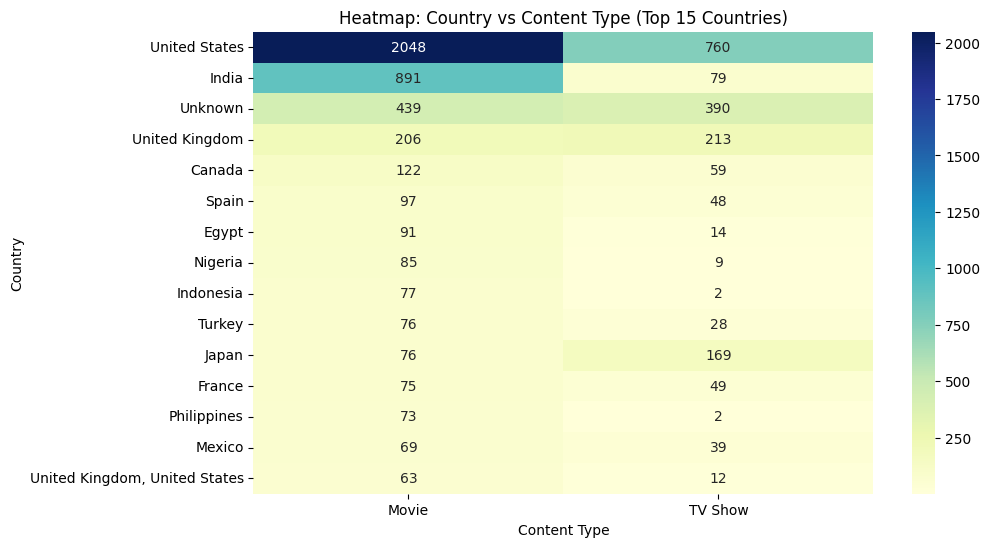

In [61]:
# Country vs Type pivot
country_type_matrix = pd.crosstab(df["country"], df["type"])

# Top 15 countries for better visualization
top_countries = country_type_matrix.sort_values("Movie", ascending=False).head(15)

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(top_countries, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Heatmap: Country vs Content Type (Top 15 Countries)")
plt.xlabel("Content Type")
plt.ylabel("Country")
plt.show()

## 7) Business Insights Summary

#### Goal: Translating numbers into insights

1) Content Mix
- Movies are still the majority on Netflix, but TV Shows have been growing steadily since 2015.
- This suggests Netflix is pushing more towards series to increase long-term engagement.

2) Geography
- The United States dominates content production, followed by India which has a strong focus on movies.
- Emerging contributors include the UK, Japan, and South Korea, showing global expansion.

3) Genres & Categories
- The most common categories are International Movies, Dramas, and Comedies.
- This highlights Netflix’s strategy of catering to a global audience with diverse tastes.

4) Ratings
- TV-MA is the most common rating, meaning Netflix’s content is heavily skewed towards mature audiences.
- Family/kids categories exist but are much smaller, indicating target focus is 18+ users.

5) Trends Over Time
- The volume of releases spiked after 2015, aligning with Netflix’s global expansion.
- Average content added per year has been increasing, though growth is stabilizing in recent years.

6) Directors & Actors

- A handful of directors like Rajiv Chilaka, Raúl Campos, and Steven Spielberg appear multiple times, showing partnerships with frequent contributors.
- Actors like Anupam Kher and Shah Rukh Khan (India) and popular Hollywood names have repeated appearances, highlighting Netflix’s mix of Bollywood & Hollywood.

7) Country vs Content Type
- Countries like India produce more Movies than TV Shows, while the US balances both Movies & TV Shows.
- This aligns with cultural preferences — Indian cinema is movie-heavy, whereas US has a strong series culture.